# **STANDARD NOTEBOOK TO GET RESULTS**

## 1. Clean the Data

In [2]:
import pandas as pd 
import process
import numpy as np 
# Jerome path : r'C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Data\DataBase.csv'
# Nail path : '/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv'
df = pd.read_csv(r'/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv')

df.set_index('ticker', inplace=True)

df.columns = pd.to_datetime(df.columns.str[1:], format='%Y%m%d').strftime('%d/%m/%Y')

df_cleaned = df.fillna(0) # Utilisez la méthode fillna(0) pour remplacer les NaN par 0

## 2. Run the code

Once the run is completed, you have: 
* the overall return -> overall return
* the PnL associated to the strategy
* the daily PnL associated to the strategy
* the Sharpe Ratio associated to the strategy

In [24]:
import warnings 
warnings.filterwarnings("ignore") ## so that there are no polluting warnings as output of this cell

##################################################################### PARAMETERS #####################################################################
lookback_window_0 = [4444, 4524] ## year 2018
number_of_clusters = 40
sigma = 10e-2
clustering_method = 'SPONGE' 
number_of_repetition = 20
number_of_window=50
evaluation_window = 5
eta_values = np.linspace(0.001, 0.02, 20)
np.set_printoptions(precision=4, suppress=True)
######################################################################################################################################################


overall_return, PnL, portfolio_value, daily_PnL = process.sliding_window(df_cleaned=df_cleaned, lookback_window_0=lookback_window_0, number_of_clusters=number_of_clusters, sigma=sigma, clustering_method=clustering_method, number_of_repetition=number_of_repetition, number_of_window=number_of_window, evaluation_window=evaluation_window, eta=0.01)

1.0045995030074593
step 1
0.9991145090486279
step 2
1.0061594443322375
step 3
0.988809457708251
step 4
0.9789124354261421
step 5
0.9807446397471228
step 6
0.980012356012518
step 7
0.977261272423559
step 8
0.983449957442603
step 9
0.976458428596929
step 10
0.9704614016142535
step 11
0.9699851659092895
step 12
0.9749042303131493
step 13
0.9745346438026194
step 14
0.9737317147683054
step 15
0.9714149809575928
step 16
0.9706248750816975
step 17
0.9722573785000562
step 18
0.9708455314103765
step 19
0.9697770125402223
step 20
0.9754629103312374
step 21
0.9725339515157421
step 22
0.970271440218038
step 23
0.9719487832465317
step 24
0.9745755725927095
step 25
0.9679807547978445
step 26
0.9655982744878425
step 27
0.9638688397703115
step 28
0.959922449874353
step 29
0.9602221589173845
step 30
0.9558434722849866
step 31
0.9575249520771706
step 32
0.9548113220157153
step 33
0.9517713022251758
step 34
0.9492902168742166
step 35
0.9395504189069919
step 36
0.9313148899994802
step 37
0.931503960416058

ValueError: too many values to unpack (expected 4)

## 3. Save the results to csv files (APPLY THE CELLS ONLY ONCE AS IT CREATES 3 FILES !!)

In [ ]:
year = '2018'
clustering_method = 'SL'

process.save_to_csv(year=year, clustering_method=clustering_method)


In [ ]:
year = '2018'
clustering_method = 'SPONGE'

## process.save_to_csv(year=year, clustering_method=clustering_method)

df_daily = pd.DataFrame(daily_PnL, columns=['Daily PnL'])

df_daily.to_csv(f'daily_{year}_{clustering_method}_{evaluation_window}.csv', index=False)

df_PnL = pd.DataFrame(PnL, columns=['PnL'])

df_PnL.to_csv(f'PnL_{year}_{clustering_method}_{evaluation_window}.csv', index=False)

## 4. Get SP500 data for comparison

In [26]:
start_date = '2018-01-01'
end_date = '2018-12-31'

sp500_PnL = process.get_sp500_PnL(start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


## 5. Plot Portfolio Cumulative PnL vs SP500 Cumulative PnL

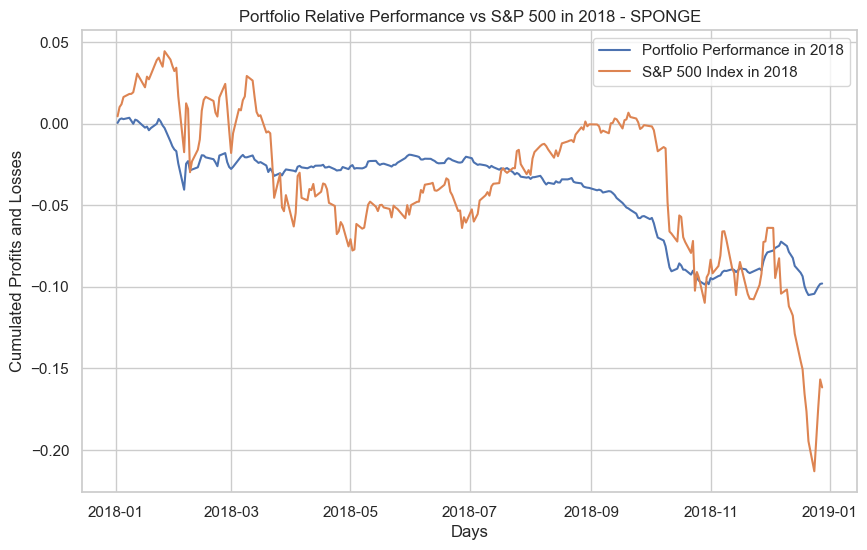

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

year = '2018'
# Calculate the cumulative returns
portfolio_cumulative = pd.DataFrame(index = sp500_PnL.index, columns=[f'Portfolio Performance in {year}'], data=PnL)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the relative performance using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=portfolio_cumulative)
sns.lineplot(data=sp500_PnL.cumsum(), label=f'S&P 500 Index in {year}')
plt.xlabel('Days')
plt.ylabel('Cumulated Profits and Losses')
plt.title(f'Portfolio Relative Performance vs S&P 500 in {year} - {clustering_method}')
plt.legend()
plt.show()

# 6. Plot portfolio value alone

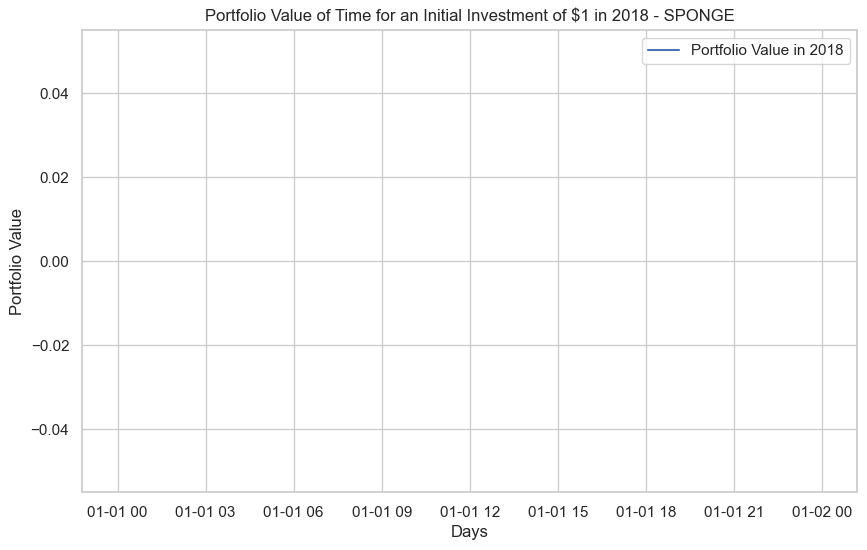

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)

portfolio_value = pd.DataFrame(index = sp500_PnL.index, columns=[f'Portfolio Value in {year}'], data=portfolio_value)

# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer la PnL cumulative avec seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(portfolio_value, color='blue')

# Ajouter des titres et des légendes
plt.title(f'Portfolio Value of Time for an Initial Investment of $1 in {year} - {clustering_method}')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')

# Afficher le graphique
plt.show()

# 7. Barplot Daily PnL vs SP500

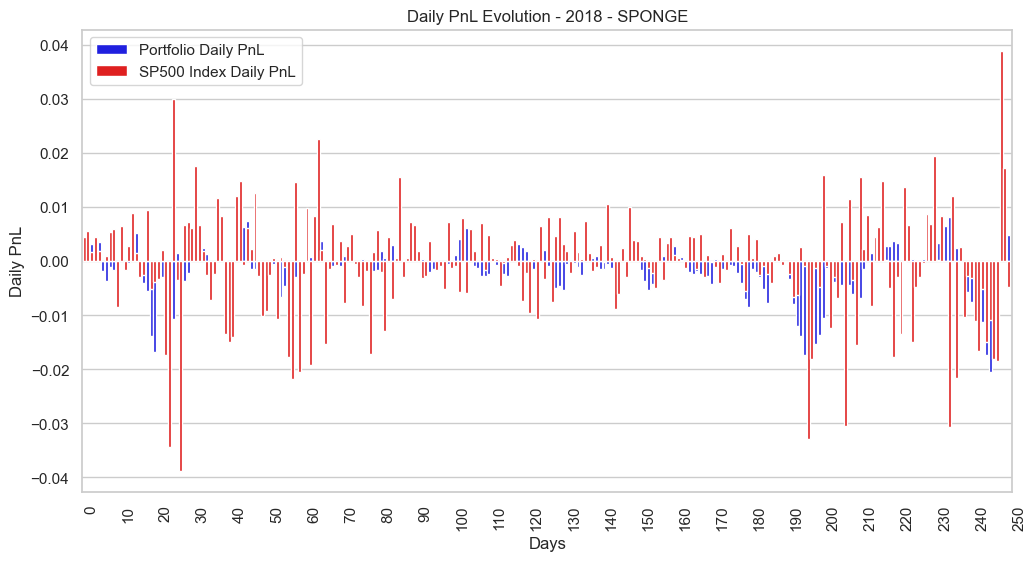

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)
days = np.arange(1, len(daily_PnL) + 1)

# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer l'évolution quotidienne de la PnL sous forme de diagramme à barres avec seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=days, y=daily_PnL, color='blue', width=0.8, label='Portfolio Daily PnL')  # Ajustez la largeur ici
ax = sns.barplot(x=days, y=sp500_PnL, color='red', width=0.8, label='SP500 Index Daily PnL')

# Rotation des étiquettes de l'axe des abscisses de 45 degrés avec un ajustement
ax.set_xticks(np.arange(0,251,10))
ax.set_xticklabels(ax.get_xticks(), rotation=90, ha='right', rotation_mode='anchor')

# Ajouter des titres et des légendes
plt.title(f'Daily PnL Evolution - {year} - {clustering_method}')
plt.xlabel('Days')
plt.ylabel('Daily PnL')
plt.legend()

# Afficher le graphique
plt.show()

# 8. Plot everything (SPONGE vs Signed Laplacian vs SP500)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Calculate the cumulative returns
portfolio_cumulative_SL = pd.DataFrame(index=sp500_PnL.iloc[:-1].index, columns=['Signed Laplacian Portfolio Performance in 2017'], data=PnL)
portfolio_cumulative_SPONGE = pd.DataFrame(index=sp500_PnL.iloc[:-1].index, columns=['SPONGE Portfolio Performance in 2017'], data=PnL_SPONGE.values)

# Combine dataframes for seaborn plotting
combined_df = pd.concat([portfolio_cumulative_SL, portfolio_cumulative_SPONGE, sp500_PnL.cumsum()], axis=1)
combined_df.columns = ['Signed Laplacian', 'SPONGE', 'S&P 500 Index in 2017']

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the relative performance using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, palette=['blue', 'red', 'green'])
plt.xlabel('Days')
plt.ylabel('Cumulated Profits and Losses')
plt.title('Portfolio Relative Performance vs S&P 500 in 2017')
plt.legend()
plt.show()